Пришло время первого небольшого проекта по статистике! На этот раз исследуем набор данных о видеоиграх, объем продаж которых составил более 100 000 копий.
Задания 
1.	Первый шаг – загрузить данные и убедиться, что всё считалось правильно: посмотреть на столбцы, размер, наличие пропущенных значений (если есть – удалить). Также изучите типы переменных.
2.	Постройте график распределения количества выпущенных игр по годам и выведите описательные характеристики переменной Year.
3.	На каких платформах произошло больше всего релизов?
4.	Игры каких издателей (Publisher) встречаются в датасете чаще всего?
5.	В каком регионе медианное значение объема продаж игр Nintendo является наибольшим? (Регионы: NA, EU, JP, Other)
6.	Изучите объемы продаж игр Nintendo в Японии с разбивкой жанрам. Посмотрите на медиану, среднее, межквартильный размах.
7.	Визуализируйте динамику изменения объема мировых продаж (Global_Sales) по годам для игр Nintendo следующих жанров: Fighting, Simulation, Platform, Racing, Sports. В какие моменты времени было продано больше всего игр жанра Sports?
Описание данных
Имеются следующие поля:
•	Rank – место по объему продаж
•	Name – название игры
•	Platform – платформа, на которой выпущена игра
•	Year – год релиза
•	Genre – жанр
•	Publisher – издатель
•	NA_Sales – продажи в Северной Америке, в млн.
•	EU_Sales – продажи в Европе, в млн.
•	JP_Sales – продажи в Японии, в млн.
•	Other_Sales – продажи в остальном мире, в млн.
•	Global_Sales – продажи по всему миру, в млн.


In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib as mpl

In [31]:
games_data = pd.read_csv('games.csv')
games_data

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [51]:
games_data.shape

(16598, 11)

In [49]:
games_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [61]:
games = games_data[~games_data['Year'].isnull()]
games

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [67]:
games.Year.value_counts()

Year
2009.0    1431
2008.0    1428
2010.0    1259
2007.0    1202
2011.0    1139
2006.0    1008
2005.0     941
2002.0     829
2003.0     775
2004.0     763
2012.0     657
2015.0     614
2014.0     582
2013.0     546
2001.0     482
1998.0     379
2000.0     349
2016.0     344
1999.0     338
1997.0     289
1996.0     263
1995.0     219
1994.0     121
1993.0      60
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1989.0      17
1983.0      17
1990.0      16
1987.0      16
1988.0      15
1985.0      14
1984.0      14
1980.0       9
2017.0       3
2020.0       1
Name: count, dtype: int64

<Axes: xlabel='Year', ylabel='Count'>

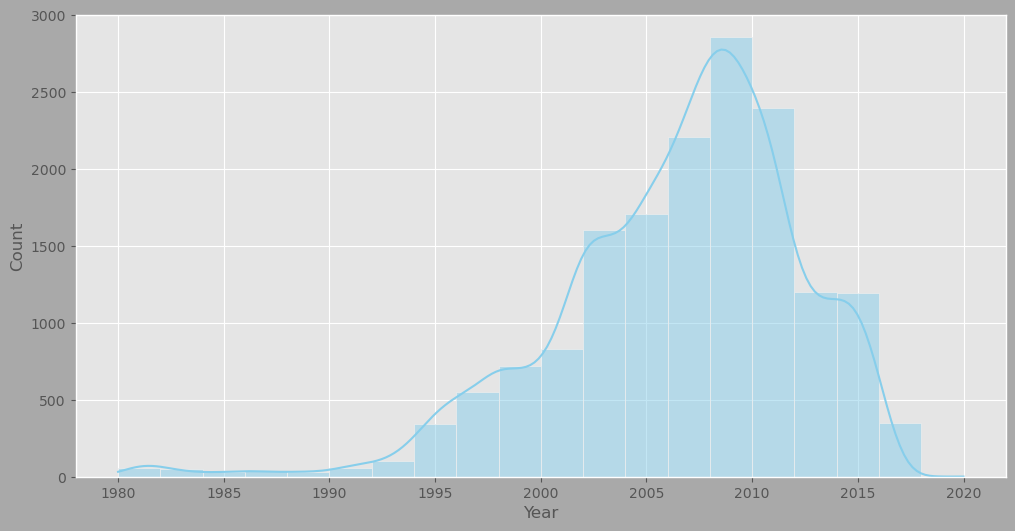

In [88]:
mpl.style.use('ggplot')
plt.figure(figsize=(12, 6), facecolor='#A9A9A9')
sns.histplot(data=games, x="Year", bins=20, kde=True, color='skyblue') 

In [91]:
games.Year.describe()

count    16327.000000
mean      2006.406443
std          5.828981
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2020.000000
Name: Year, dtype: float64

In [93]:
games.Year.value_counts().describe()

count      39.000000
mean      418.641026
std       451.735920
min         1.000000
25%        19.000000
50%       289.000000
75%       710.000000
max      1431.000000
Name: count, dtype: float64

In [103]:
games_data.Platform.value_counts()

Platform
DS      2163
PS2     2161
PS3     1329
Wii     1325
X360    1265
PSP     1213
PS      1196
PC       960
XB       824
GBA      822
GC       556
3DS      509
PSV      413
PS4      336
N64      319
SNES     239
XOne     213
SAT      173
WiiU     143
2600     133
NES       98
GB        98
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: count, dtype: int64

In [105]:
games_data.Publisher.value_counts().head(10)

Publisher
Electronic Arts                 1351
Activision                       975
Namco Bandai Games               932
Ubisoft                          921
Konami Digital Entertainment     832
THQ                              715
Nintendo                         703
Sony Computer Entertainment      683
Sega                             639
Take-Two Interactive             413
Name: count, dtype: int64

In [125]:
games_data.query('Publisher == "Nintendo"')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].mean()

NA_Sales       1.161977
EU_Sales       0.595647
JP_Sales       0.647824
Other_Sales    0.135605
dtype: float64

In [123]:
games_data.query('Publisher == "Nintendo"')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].median()

NA_Sales       0.37
EU_Sales       0.12
JP_Sales       0.28
Other_Sales    0.03
dtype: float64

In [149]:
JP_Sales_by_Genre = games_data.query('Publisher == "Nintendo"').groupby('Genre').agg({'JP_Sales': 'mean'})\
                              .rename(columns ={'JP_Sales': 'mean_Sales'})
JP_Sales_by_Genre['median_Sales'] = games_data.query('Publisher == "Nintendo"').groupby('Genre').agg({'JP_Sales': 'median'})
JP_Sales_by_Genre['IQR_Sales'] = games_data.query('Publisher == "Nintendo"')\
                                           .groupby('Genre')['JP_Sales']\
                                           .agg([('IQR_Sales', lambda x: x.quantile(0.75) - x.quantile(0.25))])
JP_Sales_by_Genre

,mean_Sales,median_Sales,IQR_Sales
Genre,,,
Action,0.370127,0.170,0.3800
Adventure,0.257429,0.090,0.2000
Fighting,0.830000,0.500,1.2325
Misc,0.552500,0.250,0.6800
Platform,0.913929,0.525,0.8575
Puzzle,0.501216,0.255,0.5225
Racing,0.789730,0.340,0.7900
Role-Playing,0.964528,0.350,0.5750
Shooter,0.233462,0.125,0.1975


C:\Users\tsyto\AppData\Local\Temp\ipykernel_32588\3844832157.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=games_data.query('Publisher == "Nintendo"'), x='Genre', y='JP_Sales', palette='deep')


<Axes: xlabel='Genre', ylabel='JP_Sales'>

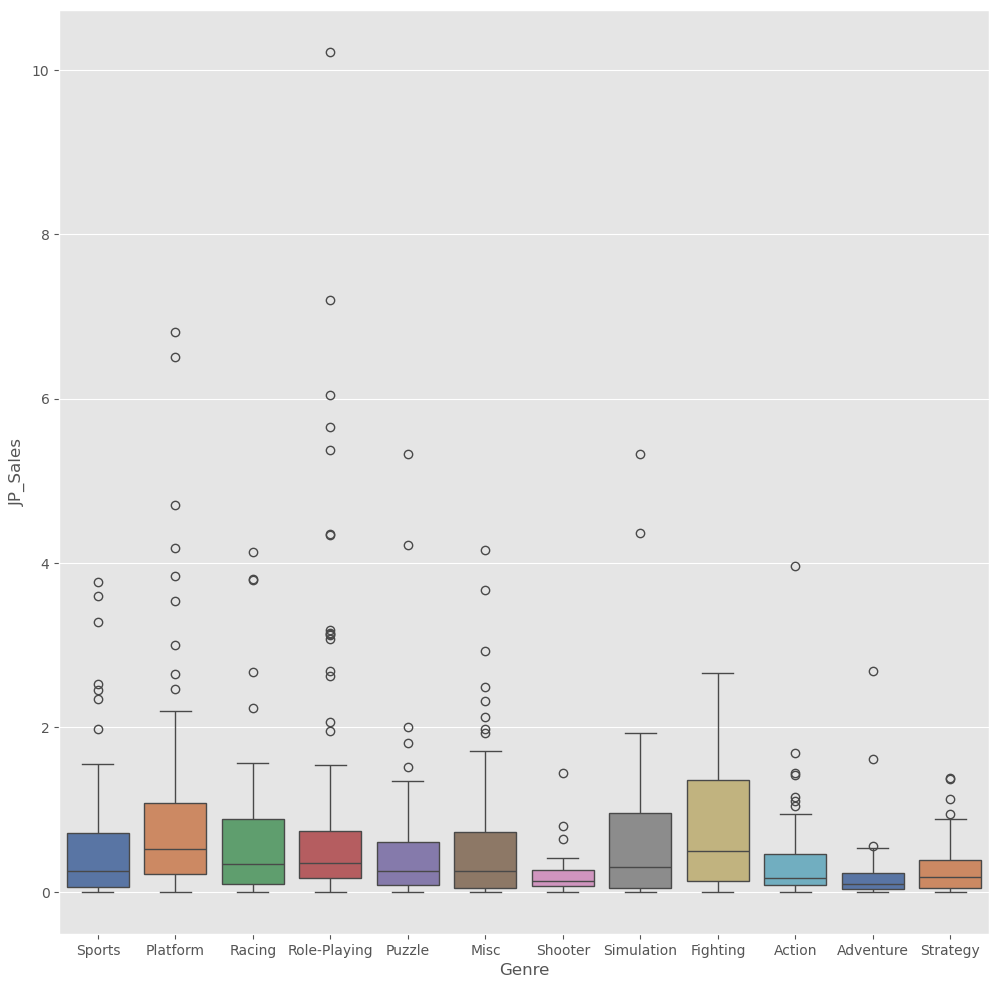

In [199]:
plt.figure(figsize=(12, 12))
sns.boxplot(data=games_data.query('Publisher == "Nintendo"'), x='Genre', y='JP_Sales', palette='deep')

In [189]:
Genres = ['Fighting', 'Simulation', 'Platform', 'Racing', 'Sports']
Global_Sales_by_year = games_data.query('Publisher == "Nintendo" and Genre in @Genres')\
                                 .groupby(['Genre', 'Year'], as_index = False).agg({'Global_Sales': 'sum'})


Text(0.5, 1.0, 'Динамика изменения объема мировых продаж на приставке Nintendo')

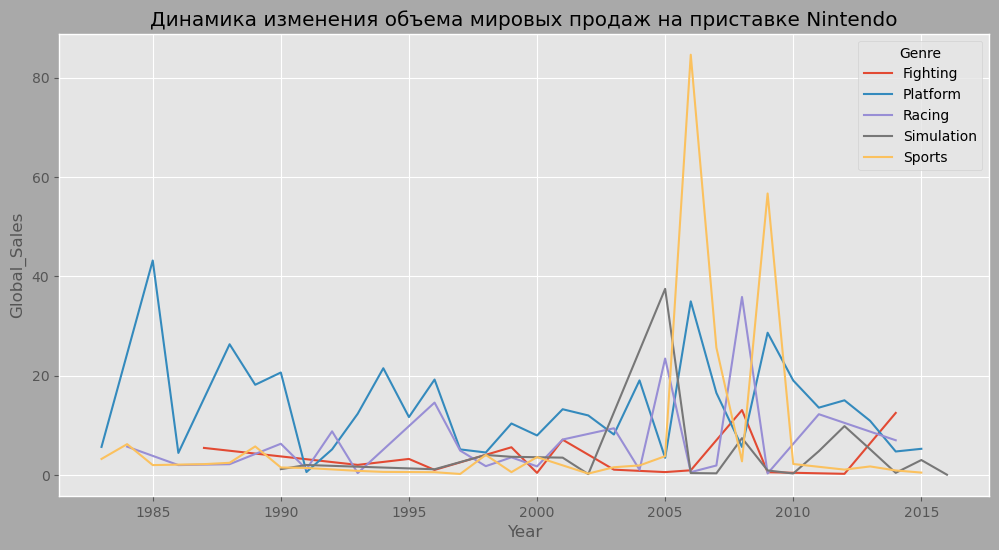

In [187]:
plt.figure(figsize=(12, 6), facecolor='#A9A9A9')
sns.lineplot(data=Global_Sales_by_year, x='Year', y='Global_Sales', hue='Genre')
plt.title('Динамика изменения объема мировых продаж на приставке Nintendo')

In [177]:
Global_Sales_pivot = Global_Sales_by_year.pivot(index='Genre', columns='Year', values='Global_Sales')
Global_Sales_pivot = Global_Sales_pivot.fillna(0)
Global_Sales_pivot

Year,1983.0,1984.0,1985.0,1986.0,1987.0,1988.0,1989.0,1990.0,1991.0,1992.0,...,2007.0,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0
Genre,,,,,,,,,,,,,,,,,,,,,
Fighting,0.00,0.00,0.00,0.00,5.42,0.00,0.00,0.00,0.00,0.00,...,0.00,13.04,0.52,0.00,0.00,0.20,0.00,12.47,0.00,0.00
Platform,5.62,0.00,43.17,4.41,0.00,26.30,18.14,20.61,0.56,5.13,...,16.50,5.61,28.62,19.00,13.53,15.01,10.88,4.70,5.24,0.00
Racing,0.00,5.68,0.00,1.96,0.00,2.14,0.00,6.26,1.14,8.76,...,1.88,35.82,0.28,0.00,12.21,0.00,0.00,6.96,0.00,0.00
Simulation,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.14,1.98,0.00,...,0.30,7.39,0.88,0.27,4.77,9.81,5.15,0.40,2.98,0.02
Sports,3.20,6.18,1.96,0.00,2.15,2.42,5.72,1.48,1.38,0.00,...,25.63,2.72,56.67,2.18,0.00,1.05,1.69,0.88,0.45,0.00
